# A brief demo of the surveygraph package

## Growing up in Ireland

We'll give a brief demonstration of the _surveygraph_ method using the [Growing Up in Ireland](https://www.growingup.gov.ie) dataset, a major longitudinal study of youth development in Ireland. We have permission to use this data in a workshop setting in line with GDPR, however we ask that if you download a copy of this dataset during the workshop, you delete it afterwards. Permission to use this data can be obtained by the 

![GUI logo](https://raw.githubusercontent.com/surveygraph/surveygraph-tutorials/main/presentations/gui-logo-wide.jpg)

In [31]:
gui <- read.csv("https://raw.githubusercontent.com/surveygraph/surveygraph-tutorials/main/presentations/gui.csv")

## Selecting variables
We want to retain the variables relating to trust.

You could use a function, as we did above, to select columns by matching patterns against names. For example, we could select all the variables containing the text "trst."

However, in this case it is simpler to just find the variable names relating to trust in the codebook and select them manually as follows:

In [7]:
gui1 <- gui[,c(
    "criesnerves",
    "talktobaby",
    "wakeforfeed",
    "wherebabysleep",
    "babycryingproblem",
    "sleepingproblemforyou",
    "siblings",
    "babyeverbreastfed"
)]

head(gui1)

,criesnerves,talktobaby,wakeforfeed,wherebabysleep,babycryingproblem,sleepingproblemforyou,siblings,babyeverbreastfed
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2,4,3,3,2,4,2,2
2,2,5,1,3,2,4,2,1
3,1,4,3,3,2,4,1,2
4,2,4,2,3,2,3,1,1
5,1,4,3,2,2,4,1,1
6,1,4,3,1,2,4,1,2


## Data cleaning

In [8]:
gui2 <- (na.omit(gui1))  # omitting any row containing an NA value

cat("Before and after deleting any row containing an NA: ", nrow(gui1), nrow(gui2), "\n")

Before and after deleting any row containing an NA:  11134 11131 


## Graph representation of surveys

In [24]:
library("surveygraph")

First let's take a small subset of the 6889 rows in `gui2` above.

In [10]:
gui3 <- head(gui2, 200)

e <- make_projection(gui3, layer="agent", threshold_method="lcc")

str(e)

'data.frame':	4461 obs. of  3 variables:
 $ u     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ v     : int  35 38 41 43 44 47 48 55 59 63 ...
 $ weight: num  0.9 0.82 0.87 0.85 0.75 0.9 0.9 0.81 0.9 0.75 ...


## Visualising the graph

In [26]:
library("igraph")

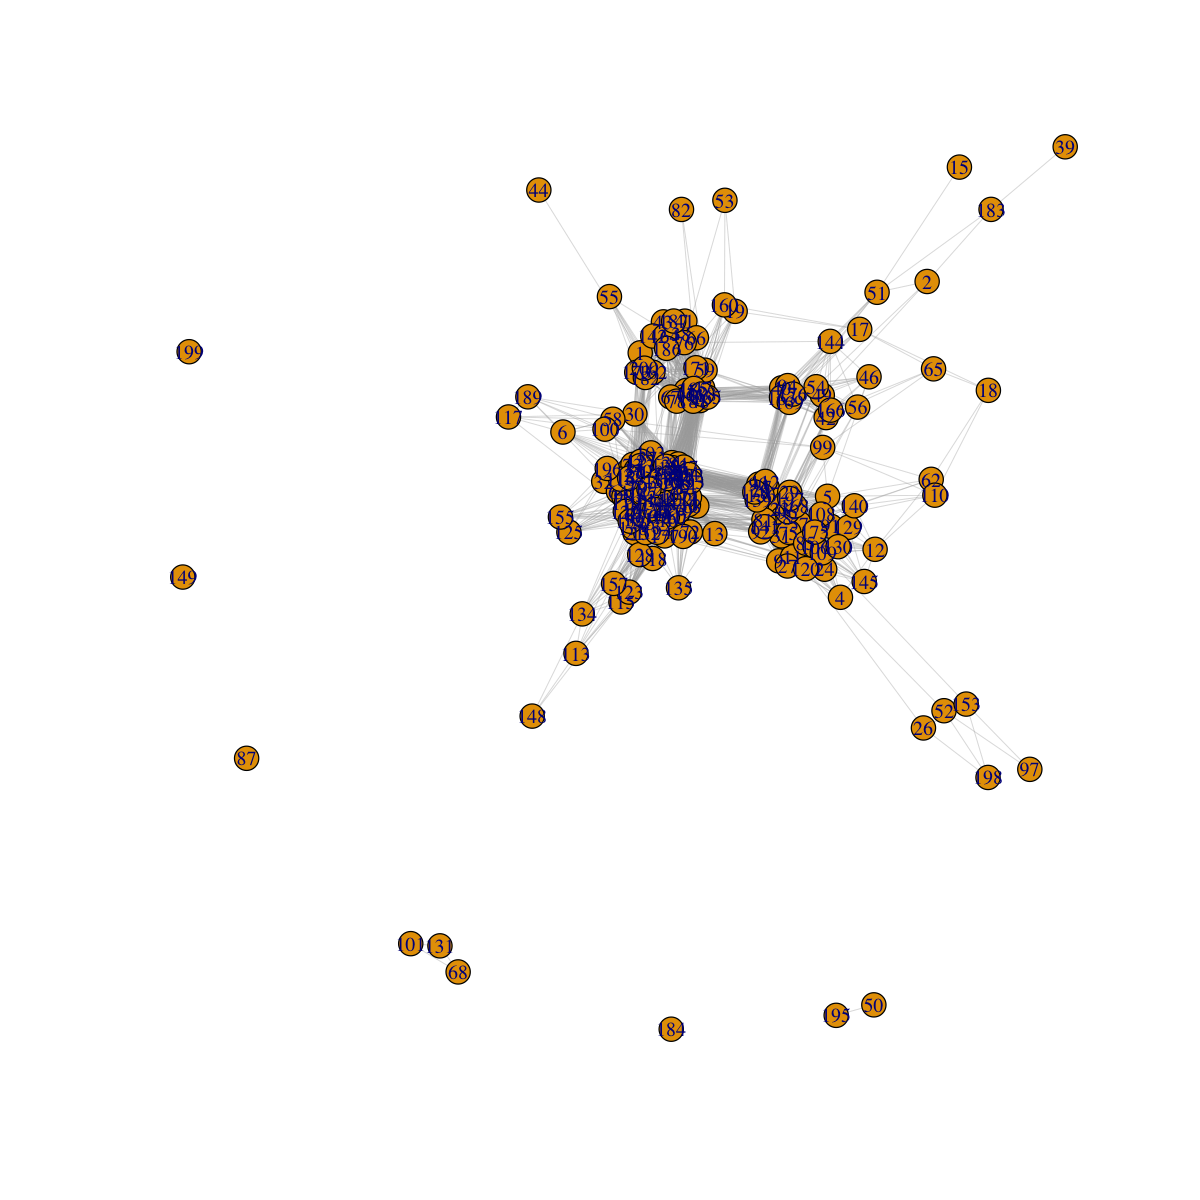

In [30]:
tmp <- row.names(gui3)

names <- data.frame(id=c(1:length(tmp)))

g <- graph_from_data_frame(e, vertices=names, directed=FALSE)

options(repr.plot.width = 10, repr.plot.height = 10)

plot(
    g, 
    vertex.size=5.5, 
    vertex.name=NA, 
    edge.width=0.3, 
    layout=layout.fruchterman.reingold
)

## Community detection

In [23]:
#Run the Walktrap algorithm
walktrap <- cluster_walktrap(g, steps=2)

# #Extract the communities from the community detection result and assign them to the node colour attribute in the graph
# V(g)$color <- membership(walktrap)

# #plot it
# plot(g, vertex.size = 5, vertex.label = NA)

# walktrap[2]

In [14]:
str(walktrap)

Class 'communities'  hidden list of 6
 $ merges    : num [1:193, 1:2] 50 146 69 25 88 60 74 126 167 208 ...
 $ modularity: num [1:194] -0.00749 -0.00725 -0.00717 -0.00708 -0.00691 ...
 $ membership: num [1:200] 4 6 1 2 2 1 2 1 2 1 ...
 $ names     : chr [1:200] "1" "2" "3" "4" ...
 $ vcount    : num 200
 $ algorithm : chr "walktrap"


In [22]:
walktrap$algorithm

[1] "walktrap"